In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Dataset/heart.csv')
df.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(df['sex'].value_counts())
print(df['chest_pain_type'].value_counts())
print(df['resting_ecg'].value_counts())
print(df['exercise_angina'].value_counts())
print(df['st_slope'].value_counts())

sex
M    725
F    193
Name: count, dtype: int64
chest_pain_type
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
resting_ecg
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
exercise_angina
N    547
Y    371
Name: count, dtype: int64
st_slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [4]:
### Category and sex are two categorical objects needed to convert to numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df['chest_pain_type']= le.fit_transform(df['chest_pain_type'])
df['resting_ecg']= le.fit_transform(df['resting_ecg'])
df['exercise_angina']= le.fit_transform(df['exercise_angina'])
df['st_slope']= le.fit_transform(df['st_slope'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   sex              918 non-null    int32  
 2   chest_pain_type  918 non-null    int32  
 3   resting_bp       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_bs       918 non-null    int64  
 6   resting_ecg      918 non-null    int32  
 7   max_hr           918 non-null    int64  
 8   exercise_angina  918 non-null    int32  
 9   oldpeak          918 non-null    float64
 10  st_slope         918 non-null    int32  
 11  heart_disease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [5]:
X = df.drop(['heart_disease'], axis=1)
y = df['heart_disease']
print(X.shape, y.shape)

(918, 11) (918,)


In [6]:
y.value_counts()

heart_disease
1    508
0    410
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=80)
y_train.value_counts()

heart_disease
1    402
0    332
Name: count, dtype: int64

In [8]:
### Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)


print('Train acc -> ',gbc.score(X_train,y_train)*100)
print('Test acc -> ',gbc.score(X_test,y_test)*100)

Train acc ->  94.6866485013624
Test acc ->  89.67391304347827


In [9]:
# Import necessary libraries
# from sklearn.model_selection import GridSearchCV
 
# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
# }
 
# gb_model = GradientBoostingClassifier()
 
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
 
# grid_search.fit(X_train, y_train)


In [10]:
y_pred_abc = gbc.predict(X_test)
print(y_pred_abc)
from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm_gbc = confusion_matrix(y_test, y_pred_abc)
cm_gbc

[0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1]


array([[68, 10],
       [ 9, 97]], dtype=int64)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        78
           1       0.91      0.92      0.91       106

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



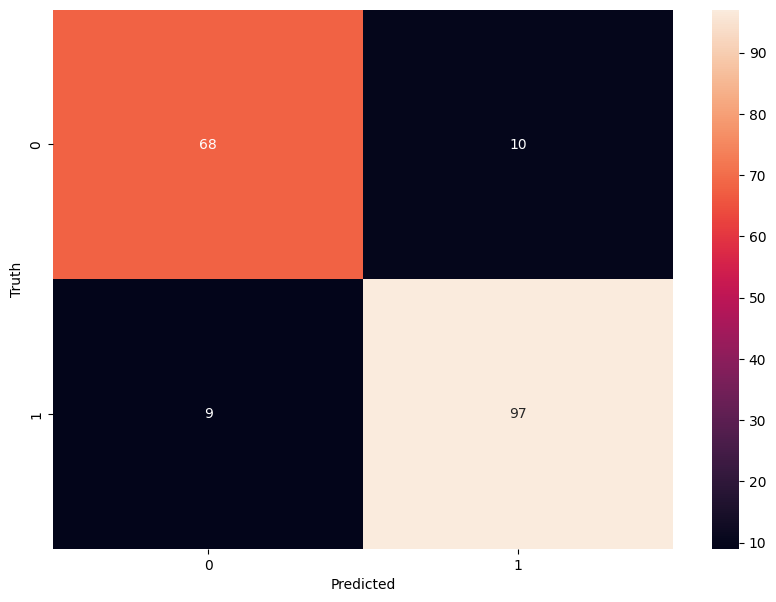

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_gbc, annot=True)

plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_pred_abc))

In [12]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./hd-gbc.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gbc, file)

In [13]:
# evaluate model 
# LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
with open(model_pkl_file, 'rb') as file:  
    loaded_rf = pickle.load(file)
    y_pred = loaded_rf.predict(X_test)

    # check results
    pred = loaded_rf.score(X_test, y_test)
    print(f"Accuracy : {pred * 100}%")

Accuracy : 89.67391304347827%
